In [2]:
# SETUP INSTRUCTIONS
# Run each cell below to set up environment
# Make sure to adjust subjectid and path variables
# Run pupillabs test BEFORE this protocol to ensure measurements are as expected
path_base = 'C:/Users/kebl6975/Documents/GitHub/cvd_pupillometry/subjectdata/'
# can add subject number + date
subject_id = 9
subj_base = 'sub-009/pipr-90s-binoc-sub-009_ses-01_dat-20230818' # pipr-sub-subjectID-ses-sesID-dat-date - sub-xxx-ses-xx-dat-yyyymmdd

In [3]:
# Set up stlab
from pyplr import stlab
d = stlab.SpectraTuneLab(password='2294b16eea08a15a')
d.turn_off()

LIGHT HUB login success
User authenticated as: admin
The following addresses are defined: [1, 1004, 1023]
Call get_luminaires() / get_device_info() for more info


<Response [200]>

Light engine is now set up, and so it is now possible to access the methods from the REST API. 

C:\Users\kebl6975\Documents\GitHub\cvd_pupillometry\pyplr\calibrate.py:368: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for led, df in self.data.groupby(["led"]):
C:\Users\kebl6975\Documents\GitHub\cvd_pupillometry\pyplr\calibrate.py:369: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lkp_tbl = lkp_tbl.append(self.interp_led_spectra(led, df))
C:\Users\kebl6975\Documents\GitHub\cvd_pupillometry\pyplr\calibrate.py:369: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lkp_tbl = lkp_tbl.append(self.interp_led_spectra(led, df))
C:\Users\kebl6975\Documents\GitHub\cvd_pupillometry\pyplr\calibrate.py:369: FutureWarning: The frame.append method is de

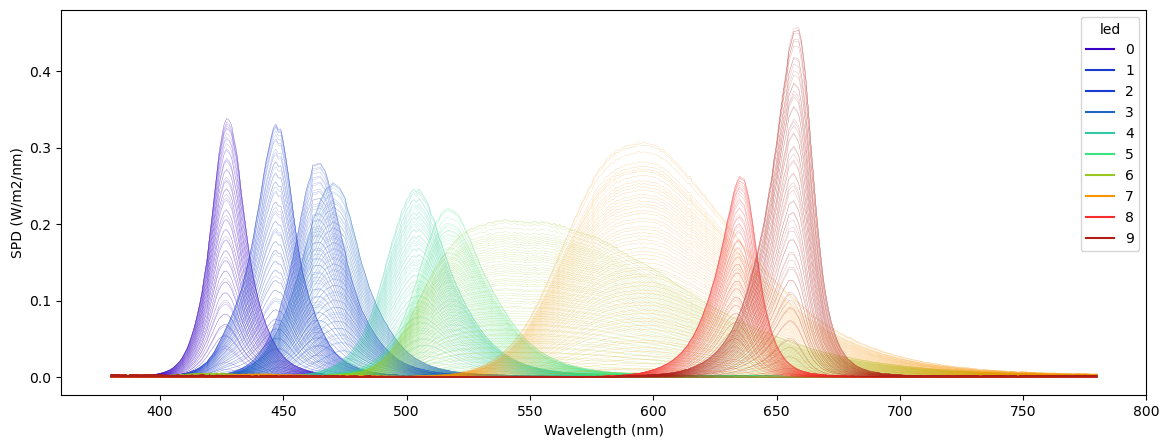

In [1]:
# from pyplr.calibrate import CalibrationContext as calibrationContext
# Calibration - important
import pyplr.calibrate as calb
from importlib import reload
reload(calb)
# file type to be read must be in format of:
# led | intensity | wavelength 1 (380) | wavelength 2 | ... | wavelength n (780)

cc = calb.CalibrationContext(
    'S2_corrected_oo_spectra.csv', binwidth=1)
_ = cc.plot_calibrated_spectra()


In [4]:
# calculate the peak spectral sensitivity for each LED at its maximum intensity setting
cc.lkp.xs(key=4095, level=1).idxmax(axis=1)

led
0    427
1    447
2    465
3    470
4    505
5    517
6    540
7    594
8    635
9    659
dtype: int64

In [5]:
blue_led = 3
red_led = 9
target_lux = 800

# Find the required intensity setting of the blue led for 800 lux
blue_intensity = (cc.lux.loc[blue_led].sub(target_lux)
                                      .abs()
                                      .idxmin())
#                                     .values[0])

# Find the intensity setting of the red led for 800 lux
red_intensity = cc.match(match_led=blue_led,
                         match_led_intensity=blue_intensity,
                         target_led=red_led,
                         match_type='irrad')[1]

C:\Users\kebl6975\Documents\GitHub\cvd_pupillometry\pyplr\CIE.py:5908: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  sss.index = pd.Int64Index(sss.index)


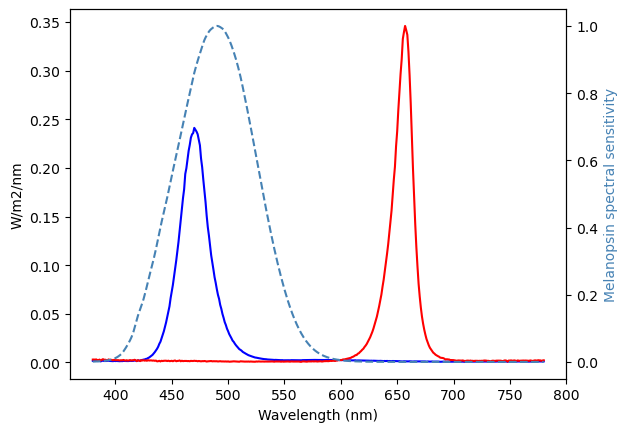

In [6]:
import matplotlib.pyplot as plt
from pyplr.CIE import get_CIES026

fig, ax = plt.subplots()
sss = get_CIES026(binwidth=1)
ax.plot(cc.lkp.loc[(blue_led, blue_intensity)], c='blue')
ax.plot(cc.lkp.loc[(red_led, red_intensity)], c='red')

ax2 = ax.twinx()
ax2.plot(sss['I'], ls='dashed', c='steelblue') # melanopsin = "I"
ax2.set_ylabel('Melanopsin spectral sensitivity', c='steelblue')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('W/m2/nm');

In [7]:
from pyplr import stlab

blue_spec, red_spec = [0]*10, [0]*10
blue_spec[blue_led] = blue_intensity
red_spec[red_led] = red_intensity
d.turn_off()

<Response [200]>

In [8]:
from time import sleep
# import random # not using this library unless we want to randomize stims
from pyplr.pupil import PupilCore
from pyplr.utils import unpack_data_pandas
from pyplr.protocol import input_subject_id, subject_dir
# Connect to Pupil Core
p = PupilCore()
p.check_3d_model()

> Refit the 3d model? [y/n]: y
> Unfreezing 3d model for eye 0
> Unfreezing 3d model for eye 1
> Ask the participant to roll their eyes
> Press "Enter" when ready to freeze the model: 
> Freezing 3d model for eye 0
> Freezing 3d model for eye 1


Please enter subject ID: 009
> Grabbing 570 seconds of pupil.1.3d
> Grabbing 570 seconds of pupil.0.3d
> Waiting for a light to stamp...
> Light stamped on frame.world at 573441.0426070001
> Waiting for a light to stamp...
> Light stamped on frame.world at 573532.5666680001
> Waiting for a light to stamp...
> Light stamped on frame.world at 573624.0038790001
> Waiting for a light to stamp...
> Light stamped on frame.world at 573715.466827
> Waiting for a light to stamp...
> Light stamped on frame.world at 573806.9778730001
> Waiting for a light to stamp...
> Light stamped on frame.world at 573898.3189300001
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futur

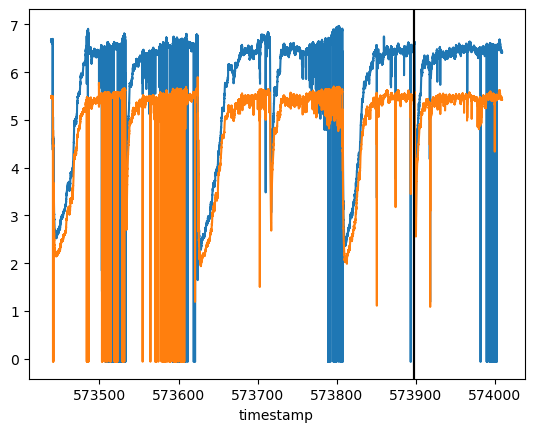

In [9]:
# PIPR STIMS - USE THIS ONE
d.turn_off()
subject_id = input_subject_id()
subj_dir = subject_dir(subject_id)
sleep(2)
ISI = 85 # interstimulus time (seconds) = this variable + 5s due to sleep + processing
num_trials = 6 # total number of trials
run_time = ISI*num_trials + 5*num_trials + 30 # appropriate offset to account for stim duration + sleeps


# Start a new recording called "my_recording"
p.command('R my_recording')

# Wait a few seconds
sleep(2)

# Make an annotation for when the light comes on
annotation = p.new_annotation('LIGHT_ON')

# Start the .light_stamper(...) and .pupil_grabber(...)
# this only captures one eye
# pgr_future = p.pupil_grabber(topic='pupil.1.3d', seconds=25) # time here is TOTAL run time
pgr_future_eye1 = p.pupil_grabber(topic='pupil.1.3d', seconds=run_time) # time here is TOTAL run time
pgr_future_eye0 = p.pupil_grabber(topic='pupil.0.3d', seconds=run_time) # time here is TOTAL run time

sleep(2)
##################################
# Administer light stimulus here #
led_list = [3,9]*3
# random.shuffle(led_list) # use this if stims should be randomized
for led in led_list:
    intensities = [0]*10
    if led == 3:
        intensities[led] = int(blue_intensity)
    else:
        intensities[led] = int(red_intensity)
    lst_future = p.light_stamper(annotation=annotation, timeout=10)
    d.set_spectrum_a(intensities)
    sleep(1.)
    d.turn_off()
    sleep(ISI)
    sleep(5) # make sure there is extra time so that trials do not overlap
##################################

# Wait for the futures
while lst_future.running() or pgr_future_eye0.running() or pgr_future_eye1.running():
    print('Waiting for futures...')
    sleep(1)

# End recording
p.command('r')

# Get the timestamp and pupil data
timestamp = lst_future.result()[1]
data_eye0 = unpack_data_pandas(pgr_future_eye0.result())
data_eye1 = unpack_data_pandas(pgr_future_eye1.result())
# timestamps are displayed in the output as well
# Plot the PLR
ax_0 = data_eye0['diameter_3d'].plot()
ax_0.axvline(x=timestamp, color='k')
ax_1 = data_eye1['diameter_3d'].plot()
ax_1.axvline(x=timestamp, color='k')

In [10]:
# display data from pandas table
data_eye0

,id,topic,method,norm_pos,diameter,confidence,sphere,projected_sphere,circle_3d,diameter_3d,ellipse,location,model_confidence,theta,phi
timestamp,,,,,,,,,,,,,,,
573439.005589,0,pupil.0.3d,pye3d 0.3.0 real-time,"[0.33598081657154194, 0.36416327639467827]",68.906725,0.768995,"{'center': [3.296626919184091, 0.6385576496956...","{'center': [119.83227094275512, 100.5656079507...","{'center': [-3.0427475808910667, 2.68457678038...",6.681941,"{'center': [64.50831678173606, 122.08065093222...","[64.50831678173606, 122.08065093222177]",1.0,1.372623,-2.242326
573439.017763,0,pupil.0.3d,pye3d 0.3.0 real-time,"[0.33510437859182257, 0.3641956626783974]",68.894994,0.789629,"{'center': [3.296626919184091, 0.6385576496956...","{'center': [119.83227094275512, 100.5656079507...","{'center': [-3.0602465645531134, 2.68471805142...",6.682700,"{'center': [64.34004068962993, 122.07443276574...","[64.34004068962993, 122.0744327657477]",1.0,1.372610,-2.244524
573439.033179,0,pupil.0.3d,pye3d 0.3.0 real-time,"[0.3350070809390959, 0.36417566222106734]",68.831181,0.784997,"{'center': [3.296626919184091, 0.6385576496956...","{'center': [119.83227094275512, 100.5656079507...","{'center': [-3.0618762444262324, 2.68511488427...",6.676246,"{'center': [64.32135954030642, 122.07827285355...","[64.32135954030642, 122.07827285355508]",1.0,1.372571,-2.244735
573439.044427,0,pupil.0.3d,pye3d 0.3.0 real-time,"[0.335060632853796, 0.3647442724172849]",68.846053,0.746693,"{'center': [3.296626919184091, 0.6385576496956...","{'center': [119.83227094275512, 100.5656079507...","{'center': [-3.0607942334855873, 2.67384017959...",6.677371,"{'center': [64.33164150792884, 121.96909969588...","[64.33164150792884, 121.9690996958813]",1.0,1.373677,-2.244422
573439.058855,0,pupil.0.3d,pye3d 0.3.0 real-time,"[0.33575587373997223, 0.3642727239703045]",68.841296,0.771103,"{'center': [3.296626919184091, 0.6385576496956...","{'center': [119.83227094275512, 100.5656079507...","{'center': [-3.046906592431395, 2.682526888146...",6.675540,"{'center': [64.46512775807467, 122.05963699770...","[64.46512775807467, 122.05963699770153]",1.0,1.372825,-2.242815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574008.946540,0,pupil.0.3d,pye3d 0.3.0 real-time,"[0.31947504747496935, 0.354570205913488]",66.148589,0.796291,"{'center': [3.296626919184091, 0.6385576496956...","{'center': [119.83227094275512, 100.5656079507...","{'center': [-3.3638190500216374, 2.88757516524...",6.436453,"{'center': [61.339209115194116, 123.9225204646...","[61.339209115194116, 123.9225204646103]",1.0,1.352659,-2.286911
574008.961587,0,pupil.0.3d,pye3d 0.3.0 real-time,"[0.3202630984920229, 0.35459586890170713]",66.074738,0.822782,"{'center': [3.296626919184091, 0.6385576496956...","{'center': [119.83227094275512, 100.5656079507...","{'center': [-3.3474872360452275, 2.88613839291...",6.426911,"{'center': [61.49051491046839, 123.91759317087...","[61.49051491046839, 123.91759317087224]",1.0,1.352800,-2.284752
574008.977038,0,pupil.0.3d,pye3d 0.3.0 real-time,"[0.3202227951627092, 0.35508693934694946]",65.883872,0.878888,"{'center': [3.296626919184091, 0.6385576496956...","{'center': [119.83227094275512, 100.5656079507...","{'center': [-3.3473288614183283, 2.87616694519...",6.406768,"{'center': [61.48277667124016, 123.82330764538...","[61.48277667124016, 123.8233076453857]",1.0,1.353783,-2.284543


In [11]:
data_eye1

,id,topic,method,norm_pos,diameter,confidence,sphere,projected_sphere,circle_3d,diameter_3d,ellipse,location,model_confidence,theta,phi
timestamp,,,,,,,,,,,,,,,
573439.005038,1,pupil.1.3d,pye3d 0.3.0 real-time,"[0.47438514513635405, 0.562662158153157]",72.923305,0.821740,"{'center': [5.038059834702903, 1.9935445958636...","{'center': [139.47104786139272, 113.1482164558...","{'center': [-0.17294151102439415, -0.865584038...",5.494991,"{'center': [91.08194786617997, 83.968865634593...","[91.08194786617997, 83.96886563459385]",1.0,1.849511,-2.119470
573439.021792,1,pupil.1.3d,pye3d 0.3.0 real-time,"[0.4749570083764163, 0.5625778763286426]",72.907069,0.900688,"{'center': [5.038059834702903, 1.9935445958636...","{'center': [139.47104786139272, 113.1482164558...","{'center': [-0.16438125995560693, -0.864229292...",5.492732,"{'center': [91.19174560827193, 83.985047744900...","[91.19174560827193, 83.9850477449006]",1.0,1.849375,-2.118442
573439.032892,1,pupil.1.3d,pye3d 0.3.0 real-time,"[0.47543640888995203, 0.5623723051581848]",72.785930,0.869447,"{'center': [5.038059834702903, 1.9935445958636...","{'center': [139.47104786139272, 113.1482164558...","{'center': [-0.15691181812958632, -0.860871882...",5.482297,"{'center': [91.28379050687079, 84.024517409628...","[91.28379050687079, 84.0245174096285]",1.0,1.849039,-2.117508
573439.048744,1,pupil.1.3d,pye3d 0.3.0 real-time,"[0.47457433107832986, 0.5619076200609314]",72.746865,0.834083,"{'center': [5.038059834702903, 1.9935445958636...","{'center': [139.47104786139272, 113.1482164558...","{'center': [-0.169725538010697, -0.85378687241...",5.480267,"{'center': [91.11827156703933, 84.113736948301...","[91.11827156703933, 84.11373694830118]",1.0,1.848330,-2.118887
573439.059112,1,pupil.1.3d,pye3d 0.3.0 real-time,"[0.4750645768900146, 0.5624082723067299]",72.902408,0.879121,"{'center': [5.038059834702903, 1.9935445958636...","{'center': [139.47104786139272, 113.1482164558...","{'center': [-0.16279293394640781, -0.861625786...",5.492067,"{'center': [91.2123987628828, 84.0176117171078...","[91.2123987628828, 84.01761171710788]",1.0,1.849114,-2.118210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574008.935564,1,pupil.1.3d,pye3d 0.3.0 real-time,"[0.4889275001421561, 0.5594793358711956]",72.335838,0.831782,"{'center': [5.038059834702903, 1.9935445958636...","{'center': [139.47104786139272, 113.1482164558...","{'center': [0.04425345345583498, -0.8152061064...",5.423902,"{'center': [93.87408002729397, 84.579967512730...","[93.87408002729397, 84.57996751273043]",1.0,1.844472,-2.093361
574008.946552,1,pupil.1.3d,pye3d 0.3.0 real-time,"[0.48847943492798956, 0.5597732084629008]",72.480770,0.828067,"{'center': [5.038059834702903, 1.9935445958636...","{'center': [139.47104786139272, 113.1482164558...","{'center': [0.03726120573468439, -0.8199175618...",5.436102,"{'center': [93.788051506174, 84.52354397512305...","[93.788051506174, 84.52354397512305]",1.0,1.844943,-2.094244
574008.963213,1,pupil.1.3d,pye3d 0.3.0 real-time,"[0.48883649230615583, 0.5593009104416176]",72.347118,0.836503,"{'center': [5.038059834702903, 1.9935445958636...","{'center': [139.47104786139272, 113.1482164558...","{'center': [0.04283896194664916, -0.8125193243...",5.424795,"{'center': [93.85660652278192, 84.614225195209...","[93.85660652278192, 84.61422519520943]",1.0,1.844204,-2.093480


In [12]:
import os  

# os.makedirs('C:/Users/kebl6975/Documents/GitHub/cvd_pupillometry/subjectdata', exist_ok=True) 

data_eye0.to_csv(path_base + subj_base + '-eye0.csv')
data_eye1.to_csv(path_base + subj_base + '-eye1.csv')

**DATA PROCESSING BEGINS BELOW**

In [13]:
samples_eye0 = data_eye0
samples_eye1 = data_eye1

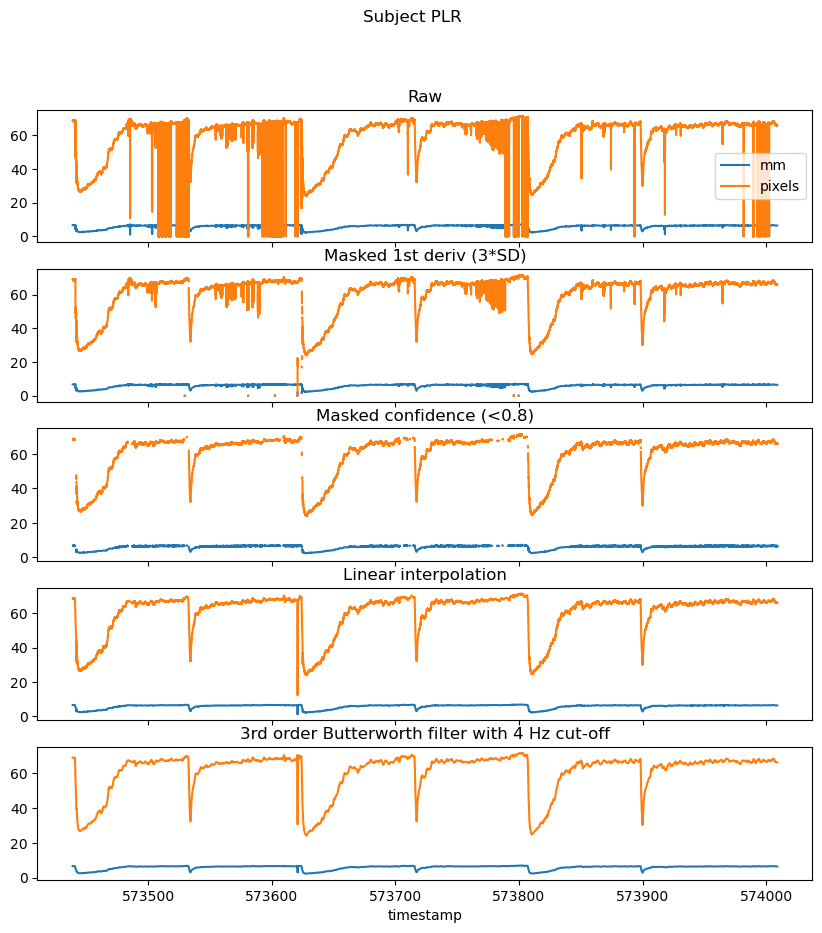

In [14]:
from pyplr import graphing
from pyplr import preproc

# Sampling frequency
SAMPLE_RATE = 120

# Pupil columns to analyse
pupil_cols = ['diameter_3d', 'diameter']

# Make figure for processing
#f, axs = graphing.pupil_preprocessing(nrows=4, subject='Example')
fig, axs = plt.subplots(5, sharex=True, figsize=(10,10))
fig.suptitle('Subject PLR')

# Plot the raw data
samples_eye0[pupil_cols].plot(title='Raw', ax=axs[0], legend=True)
axs[0].legend(loc='center right', labels=['mm', 'pixels'])

# Mask first derivative
samples_eye0 = preproc.mask_pupil_first_derivative(
    samples_eye0, threshold=3.0, mask_cols=pupil_cols)
samples_eye0[pupil_cols].plot(
    title='Masked 1st deriv (3*SD)', ax=axs[1], legend=False)

# Mask confidence
samples_eye0 = preproc.mask_pupil_confidence(
    samples_eye0, threshold=0.8, mask_cols=pupil_cols)
samples_eye0[pupil_cols].plot(
    title='Masked confidence (<0.8)', ax=axs[2], legend=False)

# Interpolate
samples_eye0 = preproc.interpolate_pupil(
    samples_eye0, interp_cols=pupil_cols)
samples_eye0[pupil_cols].plot(
    title='Linear interpolation', ax=axs[3], legend=False)

# Smooth
samples_eye0 = preproc.butterworth_series(
    samples_eye0, fields=pupil_cols, filt_order=3,
    cutoff_freq=4/(SAMPLE_RATE/2))
samples_eye0[pupil_cols].plot(
    title='3rd order Butterworth filter with 4 Hz cut-off',
    ax=axs[4], legend=False);

In [15]:
# export butterworth processed sample data for eye 0
samples_eye0.to_csv(path_base + subj_base + '-butterworth-eye0.csv') # raw data

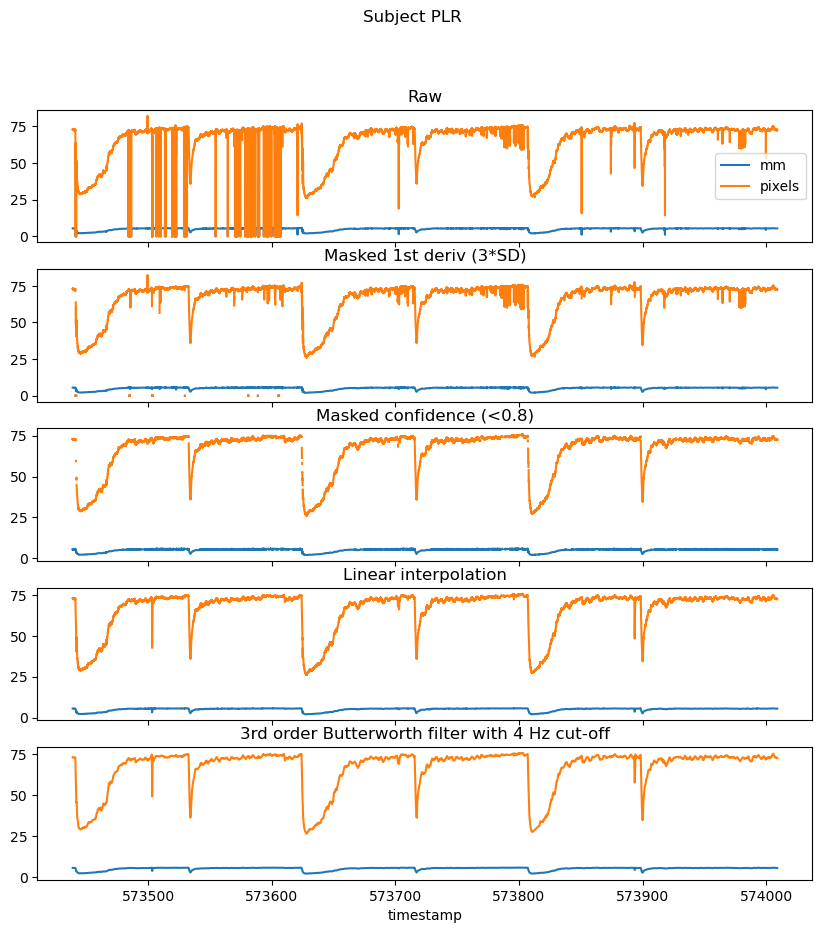

In [16]:
# Sampling frequency
SAMPLE_RATE = 120

# Pupil columns to analyse
pupil_cols = ['diameter_3d', 'diameter']

# Make figure for processing
#f, axs = graphing.pupil_preprocessing(nrows=4, subject='Example')
fig, axs = plt.subplots(5, sharex=True, figsize=(10,10))
fig.suptitle('Subject PLR')

# Plot the raw data
samples_eye1[pupil_cols].plot(title='Raw', ax=axs[0], legend=True)
axs[0].legend(loc='center right', labels=['mm', 'pixels'])

# Mask first derivative
samples_eye1 = preproc.mask_pupil_first_derivative(
    samples_eye1, threshold=3.0, mask_cols=pupil_cols)
samples_eye1[pupil_cols].plot(
    title='Masked 1st deriv (3*SD)', ax=axs[1], legend=False)

# Mask confidence
samples_eye1 = preproc.mask_pupil_confidence(
    samples_eye1, threshold=0.8, mask_cols=pupil_cols)
samples_eye1[pupil_cols].plot(
    title='Masked confidence (<0.8)', ax=axs[2], legend=False)

# Interpolate
samples_eye1 = preproc.interpolate_pupil(
    samples_eye1, interp_cols=pupil_cols)
samples_eye1[pupil_cols].plot(
    title='Linear interpolation', ax=axs[3], legend=False)

# Smooth
samples_eye1 = preproc.butterworth_series(
    samples_eye1, fields=pupil_cols, filt_order=3,
    cutoff_freq=4/(SAMPLE_RATE/2))
samples_eye1[pupil_cols].plot(
    title='3rd order Butterworth filter with 4 Hz cut-off',
    ax=axs[4], legend=False);

In [17]:
# export butterworth processed sample data for eye 1
samples_eye1.to_csv(path_base + subj_base + '-butterworth-eye1.csv') # raw data
# can stop here if necessary

**CAN STOP HERE AND DO ANALYSIS LATER**

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [19]:
# df_pipr = pd.read_csv("C:/Users/kebl6975/Documents/GitHub/cvd_pupillometry/subjectdata/sub-999_ses-02_dat-20230419.csv")
df_pipr_eye0 = pd.read_csv(path_base + subj_base + '-eye0.csv')
df_pipr_eye1 = pd.read_csv(path_base + subj_base + '-eye1.csv')

# Print header names
# print(df_pipr.columns)

# Extract the column with header "timestamp"
timestamps_eye0 = df_pipr_eye0["timestamp"]
timestamps_eye1 = df_pipr_eye1["timestamp"]
# Extract the column with header "diameter_3d"
diam_3d_eye0 = df_pipr_eye0["diameter_3d"]
diam_3d_eye1 = df_pipr_eye1["diameter_3d"]

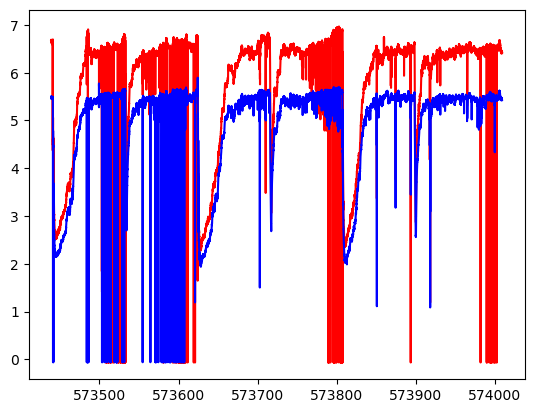

In [20]:
fig = plt.figure()
# plot eye0 in red, eye1 in blue
plt.plot(timestamps_eye0, diam_3d_eye0, 'r') # this should be the smoothed out data - if not, check
plt.plot(timestamps_eye1, diam_3d_eye1, 'b') # this should be the smoothed out data - if not, check

This is copied from the output of cell 11
> Light stamped on frame.world at 573441.0426070001
> Waiting for a light to stamp...
> Light stamped on frame.world at 573532.5666680001
> Waiting for a light to stamp...
> Light stamped on frame.world at 573624.0038790001
> Waiting for a light to stamp...
> Light stamped on frame.world at 573715.466827
> Waiting for a light to stamp...
> Light stamped on frame.world at 573806.9778730001
> Waiting for a light to stamp...
> Light stamped on frame.world at 573898.3189300001

**Edit Cell Below with Timestamps**

In [21]:
# NEED TO EDIT THIS WITH NEW TIMESTAMPS
# finds indices of each timestamp (or closest one before, if exact match cannot be found).
# finds list of timestamps where condition is true, extracts array of just this, then takes last value (closest stamp)
stamp1 = np.where(timestamps_eye0 <= 573441.0426070001)[0][-1]
stamp2 = np.where(timestamps_eye0 <= 573532.5666680001)[0][-1]
stamp3 = np.where(timestamps_eye0 <= 573624.0038790001)[0][-1]
stamp4 = np.where(timestamps_eye0 <= 573715.466827)[0][-1]
stamp5 = np.where(timestamps_eye0 <= 573806.9778730001)[0][-1]
stamp6 = np.where(timestamps_eye0 <= 573898.3189300001)[0][-1]
stamps_eye0 = [stamp1, stamp2, stamp3, stamp4, stamp5, stamp6]
stamps_eye0

[148, 6535, 13003, 17746, 23415, 28860]

In [22]:
# NEED TO EDIT THIS WITH NEW TIMESTAMPS
# finds indices of each timestamp (or closest one before, if exact match cannot be found).
# finds list of timestamps where condition is true, extracts array of just this, then takes last value (closest stamp)
stamp1 = np.where(timestamps_eye1 <= 573441.0426070001)[0][-1]
stamp2 = np.where(timestamps_eye1 <= 573532.5666680001)[0][-1]
stamp3 = np.where(timestamps_eye1 <= 573624.0038790001)[0][-1]
stamp4 = np.where(timestamps_eye1 <= 573715.466827)[0][-1]
stamp5 = np.where(timestamps_eye1 <= 573806.9778730001)[0][-1]
stamp6 = np.where(timestamps_eye1 <= 573898.3189300001)[0][-1]
stamps_eye1 = [stamp1, stamp2, stamp3, stamp4, stamp5, stamp6]
stamps_eye1

[147, 6534, 12936, 17587, 23151, 28476]

In [23]:
from pyplr import utils
from copy import deepcopy

In [24]:
df_data_eye0 = df_pipr_eye0[['timestamp', 'confidence','id','diameter','diameter_3d']]
df_data_eye1 = df_pipr_eye1[['timestamp', 'confidence','id','diameter','diameter_3d']]
df_data_eye1

,timestamp,confidence,id,diameter,diameter_3d
0,573439.005038,0.821740,1,72.923305,5.494991
1,573439.021792,0.900688,1,72.907069,5.492732
2,573439.032892,0.869447,1,72.785930,5.482297
3,573439.048744,0.834083,1,72.746865,5.480267
4,573439.059112,0.879121,1,72.902408,5.492067
...,...,...,...,...,...
34711,574008.935564,0.831782,1,72.335838,5.423902
34712,574008.946552,0.828067,1,72.480770,5.436102
34713,574008.963213,0.836503,1,72.347118,5.424795
34714,574008.974241,0.833816,1,72.404755,5.429071


**Extract ranges from samples based on event timing and sample count, eye 0**

Adapted from extract() from utils.py. Set variables - change as necessary. 
Note: even though ISI is 120, we only want 60s of post measurement

In [25]:
samples_eye0 = df_data_eye0
event_starts_eye0 = stamps_eye0
onset_time = 1
duration_time = 60
offset = -60*onset_time # 60 sample rate, start 1s before light to get baseline
duration = 60*duration_time  # 60 sample rate

# find the indexes of the event starts, and offset by sample count
range_idxs_eye0 = (
    np.searchsorted(samples_eye0.index, event_starts_eye0, "left") + offset
)
range_duration = duration

In [26]:
range_idxs_eye0

array([   88,  6475, 12943, 17686, 23355, 28800], dtype=int64)

In [27]:
# make a hierarchical index for eye 0
samples_eye0["orig_idx"] = samples_eye0.index
midx = pd.MultiIndex.from_product(
    [list(range(len(event_starts_eye0))), list(range(range_duration))],
    names=["event", "onset"],
)

# TODO: can add option for time index here

# get the samples
df_eye0 = pd.DataFrame()
idx = 0
for start_idx in range_idxs_eye0:
    # get the start time and add the required number of indices
    end_idx = start_idx + range_duration - 1  # .loc indexing is inclusive
    if end_idx >= len(samples_eye0):
        end_idx = len(samples_eye0) - 1
    new_df_eye0 = deepcopy(
        samples_eye0.loc[samples_eye0.index[start_idx] : samples_eye0.index[end_idx]]
    )
    #for ba in borrow_attributes:
        #new_df[ba] = events.iloc[idx].get(ba, float("nan"))
    df_eye0 = pd.concat([df_eye0, new_df_eye0])
    idx += 1
    
# if there is an error that doesn't allow the new indices to be set (size mismatch), use the if loop below
if (len(df_eye0)!= len(midx)):
    df_test = df_eye0
    temp_df = deepcopy(df_eye0.loc[df_eye0.index[-1] : df_eye0.index[-1]])
    while len(df_eye0) != len(midx):
        df_eye0= pd.concat([df_eye0, temp_df])

df_eye0.index = midx
print("Extracted ranges for {} events".format(len(event_starts_eye0)))

Extracted ranges for 6 events


C:\Users\kebl6975\AppData\Local\Temp\ipykernel_51112\2141019394.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samples_eye0["orig_idx"] = samples_eye0.index


In [28]:
df_eye0.index

MultiIndex([(0,    0),
            (0,    1),
            (0,    2),
            (0,    3),
            (0,    4),
            (0,    5),
            (0,    6),
            (0,    7),
            (0,    8),
            (0,    9),
            ...
            (5, 3590),
            (5, 3591),
            (5, 3592),
            (5, 3593),
            (5, 3594),
            (5, 3595),
            (5, 3596),
            (5, 3597),
            (5, 3598),
            (5, 3599)],
           names=['event', 'onset'], length=21600)

**Extract ranges from samples based on event timing and sample count, eye 1**

Adapted from extract() from utils.py. Set variables - change as necessary. 
Note: even though ISI is 120, we only want 60s of post measurement

In [29]:
samples_eye1 = df_data_eye1
event_starts_eye1 = stamps_eye1 
onset_time = 1
duration_time = 60
offset = -60*onset_time # 60 sample rate, start 1s before light to get baseline
duration = 60*duration_time  # 60 sample rate

# find the indexes of the event starts, and offset by sample count
range_idxs_eye1 = (
    np.searchsorted(samples_eye1.index, event_starts_eye1, "left") + offset
)
range_duration = duration

In [30]:
range_idxs_eye1

array([   87,  6474, 12876, 17527, 23091, 28416], dtype=int64)

In [31]:
# make a hierarchical index for eye 1
samples_eye1["orig_idx"] = samples_eye1.index
midx = pd.MultiIndex.from_product(
    [list(range(len(event_starts_eye1))), list(range(range_duration))],
    names=["event", "onset"],
)

# TODO: can add option for time index here

# get the samples
df_eye1 = pd.DataFrame()
idx = 0
for start_idx in range_idxs_eye1:
    # get the start time and add the required number of indices
    end_idx = start_idx + range_duration - 1  # .loc indexing is inclusive
    if end_idx >= len(samples_eye1):
        end_idx = len(samples_eye1) - 1
    new_df_eye1 = deepcopy(
        samples_eye1.loc[samples_eye1.index[start_idx] : samples_eye1.index[end_idx]]
    )
    #for ba in borrow_attributes:
        #new_df[ba] = events.iloc[idx].get(ba, float("nan"))
    df_eye1 = pd.concat([df_eye1, new_df_eye1])
    idx += 1
# if there is an error that doesn't allow the new indices to be set (size mismatch), use the if loop below
if (len(df_eye1)!= len(midx)):
    df_test = df_eye1
    temp_df = deepcopy(df_eye1.loc[df_eye1.index[-1] : df_eye1.index[-1]])
    while len(df_eye1) != len(midx):
        df_eye1= pd.concat([df_eye1, temp_df])
df_eye1.index = midx
print("Extracted ranges for {} events".format(len(event_starts_eye1)))

Extracted ranges for 6 events


C:\Users\kebl6975\AppData\Local\Temp\ipykernel_51112\3597893296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samples_eye1["orig_idx"] = samples_eye1.index


In [32]:
df_eye1.index

MultiIndex([(0,    0),
            (0,    1),
            (0,    2),
            (0,    3),
            (0,    4),
            (0,    5),
            (0,    6),
            (0,    7),
            (0,    8),
            (0,    9),
            ...
            (5, 3590),
            (5, 3591),
            (5, 3592),
            (5, 3593),
            (5, 3594),
            (5, 3595),
            (5, 3596),
            (5, 3597),
            (5, 3598),
            (5, 3599)],
           names=['event', 'onset'], length=21600)

**Re-run the processing on the multi-index data, eye 0**

In [33]:
from pyplr import graphing
from pyplr import preproc
# Calculate baselines
baselines_eye0 = df_eye0.loc[:, range(0, -offset), :].mean(level=0)

# New columns for percent signal change
df_eye0 = preproc.percent_signal_change(
    df_eye0, baselines_eye0, ['diameter_3d', 'diameter'])
df_eye0

C:\Users\kebl6975\AppData\Local\Temp\ipykernel_51112\4183176285.py:4: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  baselines_eye0 = df_eye0.loc[:, range(0, -offset), :].mean(level=0)


timestamp  confidence  id   diameter  diameter_3d  orig_idx  \
event onset                                                                    
0     0      573440.184460    0.774386   0  68.437650     6.644318        88   
      1      573440.197044    0.834008   0  68.474782     6.647990        89   
      2      573440.206368    0.831319   0  68.402762     6.641614        90   
      3      573440.221831    0.818070   0  68.269180     6.627577        91   
      4      573440.237968    0.789130   0  68.427284     6.643231        92   
...                    ...         ...  ..        ...          ...       ...   
5     3595   573960.533188    0.796004   0  66.343011     6.434767     32395   
      3596   573960.544625    0.852415   0  66.531862     6.452793     32396   
      3597   573960.560004    0.800278   0  66.318856     6.431750     32397   
      3598   573960.570242    0.853383   0  66.441157     6.445078     32398   
      3599   573960.586378    0.802747   0  66.263079     6.425972     32399   

             diameter_3d_pc  diameter_pc  
event onset                               
0     0            0.034635    -0.110093  
      1            0.089915    -0.055897  
      2           -0.006082    -0.161015  
      3           -0.217416    -0.355989  
      4            0.018272    -0.125224  
...                     ...          ...  
5     3595        -2.396466    -2.118510  
      3596        -2.123046    -1.839882  
      3597        -2.442236    -2.154148  
      3598        -2.240073    -1.973707  
      3599        -2.529874    -2.236440  

[21600 rows x 8 columns]

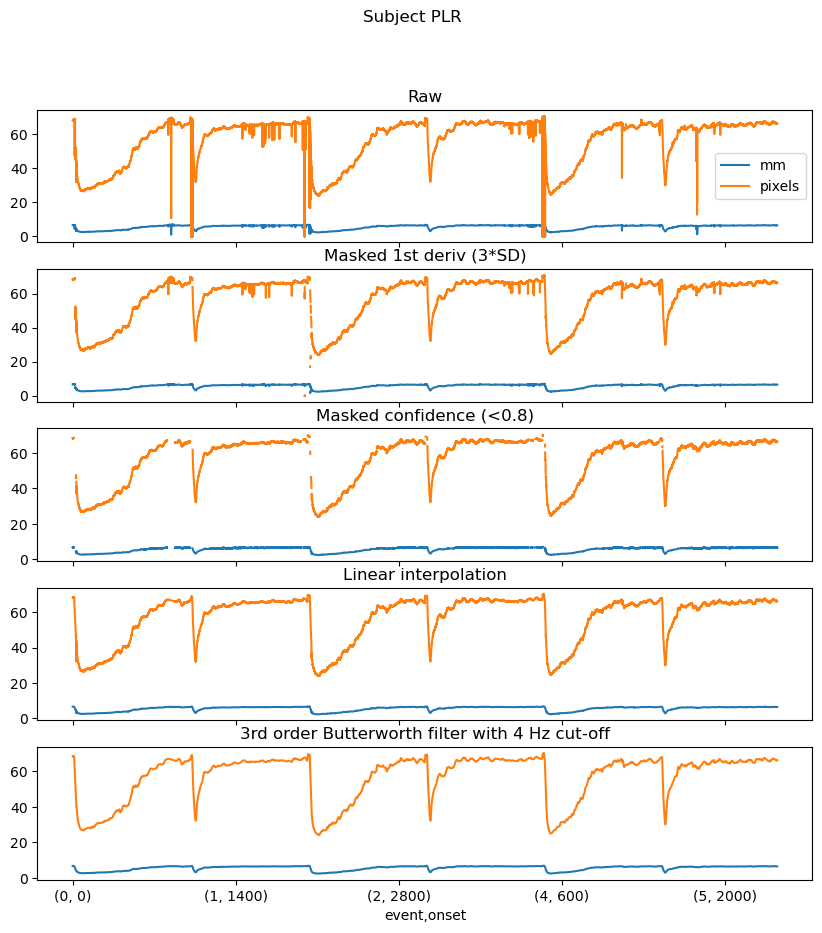

In [34]:
from pyplr import graphing
from pyplr import preproc

# Sampling frequency
SAMPLE_RATE = 120
samples_eye0 = df_eye0

# Pupil columns to analyse
pupil_cols = ['diameter_3d', 'diameter']

# Make figure for processing
#f, axs = graphing.pupil_preprocessing(nrows=4, subject='Example')
fig, axs = plt.subplots(5, sharex=True, figsize=(10,10))
fig.suptitle('Subject PLR')

# Plot the raw data
samples_eye0[pupil_cols].plot(title='Raw', ax=axs[0], legend=True)
axs[0].legend(loc='center right', labels=['mm', 'pixels'])

# Mask first derivative
samples_eye0 = preproc.mask_pupil_first_derivative(
    samples_eye0, threshold=3.0, mask_cols=pupil_cols)
samples_eye0[pupil_cols].plot(
    title='Masked 1st deriv (3*SD)', ax=axs[1], legend=False)

# Mask confidence
samples_eye0 = preproc.mask_pupil_confidence(
    samples_eye0, threshold=0.8, mask_cols=pupil_cols)
samples_eye0[pupil_cols].plot(
    title='Masked confidence (<0.8)', ax=axs[2], legend=False)

# Interpolate
samples_eye0 = preproc.interpolate_pupil(
    samples_eye0, interp_cols=pupil_cols)
samples_eye0[pupil_cols].plot(
    title='Linear interpolation', ax=axs[3], legend=False)

# Smooth
samples_eye0 = preproc.butterworth_series(
    samples_eye0, fields=pupil_cols, filt_order=3,
    cutoff_freq=4/(SAMPLE_RATE/2))
samples_eye0[pupil_cols].plot(
    title='3rd order Butterworth filter with 4 Hz cut-off',
    ax=axs[4], legend=False);

In [35]:
samples_eye0 # this now has the processed data with blinks removed
# where confidence < 0.8, it interpolates the data
# need to run these to improve the outputs
# TODO: double check what df is after this processing

timestamp  confidence  id   diameter  diameter_3d  orig_idx  \
event onset                                                                    
0     0      573440.184460    0.774386   0  68.486634     6.649990        88   
      1      573440.197044    0.834008   0  68.468403     6.648194        89   
      2      573440.206368    0.831319   0  68.449283     6.646255        90   
      3      573440.221831    0.818070   0  68.429599     6.644195        91   
      4      573440.237968    0.789130   0  68.409668     6.642036        92   
...                    ...         ...  ..        ...          ...       ...   
5     3595   573960.533188    0.796004   0  66.371262     6.435153     32395   
      3596   573960.544625    0.852415   0  66.354917     6.433403     32396   
      3597   573960.560004    0.800278   0  66.337263     6.431596     32397   
      3598   573960.570242    0.853383   0  66.318984     6.429781     32398   
      3599   573960.586378    0.802747   0  66.300792     6.428013     32399   

             diameter_3d_pc  diameter_pc  interpolated  
event onset                                             
0     0            0.034635    -0.110093             1  
      1            0.089915    -0.055897             0  
      2           -0.006082    -0.161015             0  
      3           -0.217416    -0.355989             0  
      4            0.018272    -0.125224             1  
...                     ...          ...           ...  
5     3595        -2.396466    -2.118510             1  
      3596        -2.123046    -1.839882             0  
      3597        -2.442236    -2.154148             0  
      3598        -2.240073    -1.973707             0  
      3599        -2.529874    -2.236440             0  

[21600 rows x 9 columns]

In [36]:
df_eye0

timestamp  confidence  id   diameter  diameter_3d  orig_idx  \
event onset                                                                    
0     0      573440.184460    0.774386   0  68.437650     6.644318        88   
      1      573440.197044    0.834008   0  68.474782     6.647990        89   
      2      573440.206368    0.831319   0  68.402762     6.641614        90   
      3      573440.221831    0.818070   0  68.269180     6.627577        91   
      4      573440.237968    0.789130   0  68.427284     6.643231        92   
...                    ...         ...  ..        ...          ...       ...   
5     3595   573960.533188    0.796004   0  66.343011     6.434767     32395   
      3596   573960.544625    0.852415   0  66.531862     6.452793     32396   
      3597   573960.560004    0.800278   0  66.318856     6.431750     32397   
      3598   573960.570242    0.853383   0  66.441157     6.445078     32398   
      3599   573960.586378    0.802747   0  66.263079     6.425972     32399   

             diameter_3d_pc  diameter_pc  
event onset                               
0     0            0.034635    -0.110093  
      1            0.089915    -0.055897  
      2           -0.006082    -0.161015  
      3           -0.217416    -0.355989  
      4            0.018272    -0.125224  
...                     ...          ...  
5     3595        -2.396466    -2.118510  
      3596        -2.123046    -1.839882  
      3597        -2.442236    -2.154148  
      3598        -2.240073    -1.973707  
      3599        -2.529874    -2.236440  

[21600 rows x 8 columns]

**Re-run processing on multi-index data, eye 1**

In [37]:
# Calculate baselines
baselines_eye1 = df_eye1.loc[:, range(0, -offset), :].mean(level=0)

# New columns for percent signal change
df_eye1 = preproc.percent_signal_change(
    df_eye1, baselines_eye1, ['diameter_3d', 'diameter'])
df_eye1

C:\Users\kebl6975\AppData\Local\Temp\ipykernel_51112\1788001868.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  baselines_eye1 = df_eye1.loc[:, range(0, -offset), :].mean(level=0)


timestamp  confidence  id   diameter  diameter_3d  orig_idx  \
event onset                                                                    
0     0      573440.163083    0.816628   1  72.811310     5.483656        87   
      1      573440.178353    0.827817   1  72.554050     5.463566        88   
      2      573440.188935    0.807647   1  72.750597     5.478309        89   
      3      573440.201628    0.868783   1  72.805442     5.482758        90   
      4      573440.212669    0.877302   1  72.658144     5.471830        91   
...                    ...         ...  ..        ...          ...       ...   
5     3595   573962.247837    0.844631   1  72.973289     5.470499     32011   
      3596   573962.258157    0.830275   1  73.122514     5.482431     32012   
      3597   573962.276146    0.773675   1  73.215044     5.490327     32013   
      3598   573962.290792    0.842550   1  73.070583     5.477897     32014   
      3599   573962.301462    0.823671   1  73.145087     5.483114     32015   

             diameter_3d_pc  diameter_pc  
event onset                               
0     0            0.198347     0.279446  
      1           -0.168747    -0.074866  
      2            0.100635     0.195829  
      3            0.181932     0.271364  
      4           -0.017746     0.068498  
...                     ...          ...  
5     3595        -1.407147    -1.170420  
      3596        -1.192090    -0.968322  
      3597        -1.049789    -0.843005  
      3598        -1.273818    -1.038653  
      3599        -1.179791    -0.937750  

[21600 rows x 8 columns]

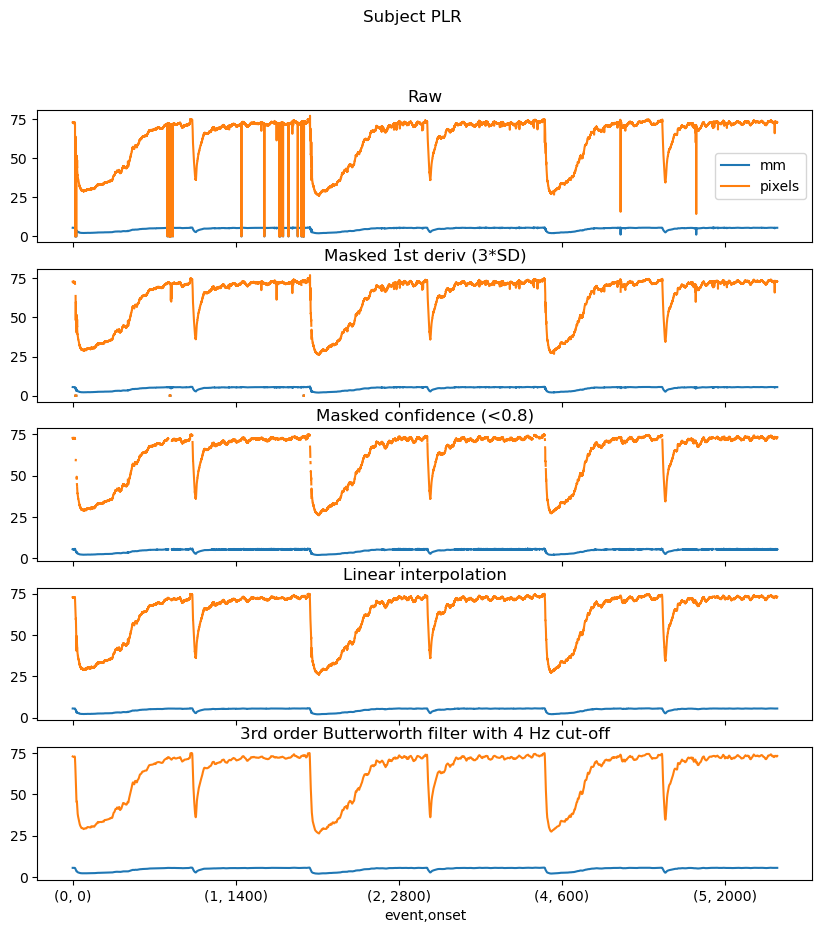

In [38]:
# Sampling frequency
SAMPLE_RATE = 120
samples_eye1 = df_eye1

# Pupil columns to analyse
pupil_cols = ['diameter_3d', 'diameter']

# Make figure for processing
#f, axs = graphing.pupil_preprocessing(nrows=4, subject='Example')
fig, axs = plt.subplots(5, sharex=True, figsize=(10,10))
fig.suptitle('Subject PLR')

# Plot the raw data
samples_eye1[pupil_cols].plot(title='Raw', ax=axs[0], legend=True)
axs[0].legend(loc='center right', labels=['mm', 'pixels'])

# Mask first derivative
samples_eye1 = preproc.mask_pupil_first_derivative(
    samples_eye1, threshold=3.0, mask_cols=pupil_cols)
samples_eye1[pupil_cols].plot(
    title='Masked 1st deriv (3*SD)', ax=axs[1], legend=False)

# Mask confidence
samples_eye1 = preproc.mask_pupil_confidence(
    samples_eye1, threshold=0.8, mask_cols=pupil_cols)
samples_eye1[pupil_cols].plot(
    title='Masked confidence (<0.8)', ax=axs[2], legend=False)

# Interpolate
samples_eye1 = preproc.interpolate_pupil(
    samples_eye1, interp_cols=pupil_cols)
samples_eye1[pupil_cols].plot(
    title='Linear interpolation', ax=axs[3], legend=False)

# Smooth
samples_eye1 = preproc.butterworth_series(
    samples_eye1, fields=pupil_cols, filt_order=3,
    cutoff_freq=4/(SAMPLE_RATE/2))
samples_eye1[pupil_cols].plot(
    title='3rd order Butterworth filter with 4 Hz cut-off',
    ax=axs[4], legend=False);

In [39]:
samples_eye1 # this now has the processed data with blinks removed
# where confidence < 0.8, it interpolates the data
# need to run these to improve the outputs
# TODO: double check what df is after this processing

timestamp  confidence  id   diameter  diameter_3d  orig_idx  \
event onset                                                                    
0     0      573440.163083    0.816628   1  72.804267     5.482818        87   
      1      573440.178353    0.827817   1  72.784654     5.481262        88   
      2      573440.188935    0.807647   1  72.765986     5.479783        89   
      3      573440.201628    0.868783   1  72.748630     5.478413        90   
      4      573440.212669    0.877302   1  72.732902     5.477182        91   
...                    ...         ...  ..        ...          ...       ...   
5     3595   573962.247837    0.844631   1  73.001122     5.473144     32011   
      3596   573962.258157    0.830275   1  73.032430     5.475322     32012   
      3597   573962.276146    0.773675   1  73.062569     5.477419     32013   
      3598   573962.290792    0.842550   1  73.090970     5.479395     32014   
      3599   573962.301462    0.823671   1  73.117134     5.481218     32015   

             diameter_3d_pc  diameter_pc  interpolated  
event onset                                             
0     0            0.198347     0.279446             0  
      1           -0.168747    -0.074866             0  
      2            0.100635     0.195829             0  
      3            0.181932     0.271364             0  
      4           -0.017746     0.068498             0  
...                     ...          ...           ...  
5     3595        -1.407147    -1.170420             0  
      3596        -1.192090    -0.968322             0  
      3597        -1.049789    -0.843005             1  
      3598        -1.273818    -1.038653             0  
      3599        -1.179791    -0.937750             0  

[21600 rows x 9 columns]

In [40]:
df_eye1

timestamp  confidence  id   diameter  diameter_3d  orig_idx  \
event onset                                                                    
0     0      573440.163083    0.816628   1  72.811310     5.483656        87   
      1      573440.178353    0.827817   1  72.554050     5.463566        88   
      2      573440.188935    0.807647   1  72.750597     5.478309        89   
      3      573440.201628    0.868783   1  72.805442     5.482758        90   
      4      573440.212669    0.877302   1  72.658144     5.471830        91   
...                    ...         ...  ..        ...          ...       ...   
5     3595   573962.247837    0.844631   1  72.973289     5.470499     32011   
      3596   573962.258157    0.830275   1  73.122514     5.482431     32012   
      3597   573962.276146    0.773675   1  73.215044     5.490327     32013   
      3598   573962.290792    0.842550   1  73.070583     5.477897     32014   
      3599   573962.301462    0.823671   1  73.145087     5.483114     32015   

             diameter_3d_pc  diameter_pc  
event onset                               
0     0            0.198347     0.279446  
      1           -0.168747    -0.074866  
      2            0.100635     0.195829  
      3            0.181932     0.271364  
      4           -0.017746     0.068498  
...                     ...          ...  
5     3595        -1.407147    -1.170420  
      3596        -1.192090    -0.968322  
      3597        -1.049789    -0.843005  
      3598        -1.273818    -1.038653  
      3599        -1.179791    -0.937750  

[21600 rows x 8 columns]

**Convert the index-level samples to time (s)**:

In [41]:
ONSET_IDX = 60
SAMPLE_RATE = 60
new_onset = (df_eye0.index.get_level_values('onset')
                    .unique()
            - ONSET_IDX) / SAMPLE_RATE
df_eye0.index = df_eye0.index.set_levels(
    levels=new_onset, level='onset')

In [42]:
df_eye0["colour"] = ""

In [43]:
for (event, onset) in df_eye0.index:
    if event%2==1:
        df_eye0["colour"][event,onset] = "red"
    else:
        df_eye0["colour"][event,onset] = "blue"

C:\Users\kebl6975\AppData\Local\Temp\ipykernel_51112\1670583221.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eye0["colour"][event,onset] = "blue"
C:\Users\kebl6975\AppData\Local\Temp\ipykernel_51112\1670583221.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eye0["colour"][event,onset] = "red"


In [44]:
ONSET_IDX = 60
SAMPLE_RATE = 60
new_onset = (df_eye1.index.get_level_values('onset')
                    .unique()
            - ONSET_IDX) / SAMPLE_RATE
df_eye1.index = df_eye1.index.set_levels(
    levels=new_onset, level='onset')

In [45]:
df_eye1["colour"] = ""

In [46]:
for (event, onset) in df_eye1.index:
    if event%2==1:
        df_eye1["colour"][event,onset] = "red"
    else:
        df_eye1["colour"][event,onset] = "blue"

C:\Users\kebl6975\AppData\Local\Temp\ipykernel_51112\2599913087.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eye1["colour"][event,onset] = "blue"
C:\Users\kebl6975\AppData\Local\Temp\ipykernel_51112\2599913087.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eye1["colour"][event,onset] = "red"


**Plot the PIPR:**

Text(0.5, 1.0, 'Right Eye, Subject = 009')

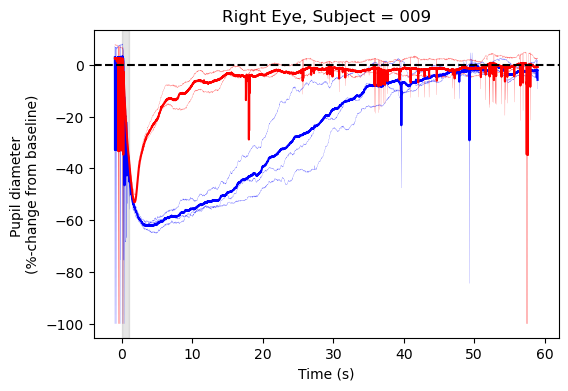

In [64]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(6,4))
for r in range(5):
    if (r==0 or r%2==0):
        c = 'blue'
    else:
        c = 'red'
    df_eye0.loc[r, 'diameter_pc'].plot(
        color=c, lw='.1', ax=ax, legend=False)

# Now show the means
avgs_eye0 = (df_eye0.reset_index()
                .groupby(['colour','onset'], as_index=False)
                .mean())
sns.lineplot(data=avgs_eye0, x='onset', y='diameter_pc', hue='colour',
                palette={'blue':'b','red':'r'}, legend=False)

# Tweak figures
ax.axvspan(0, 1, color='k', alpha=.1)
ax.axhline(0, 0, 1, color='k', ls='--')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Pupil diameter \n(%-change from baseline)')
ax.set_title('Right Eye, Subject = {}'.format(subject_id))

In [65]:
import os
if not os.path.exists(path_base + 'figures'):
    os.makedirs(path_base + 'figures')
# Save the figure in the folder
fig.savefig(path_base + 'figures/' + 'pipr-90s-binoc-sub-009_ses-01_dat-20230818' + '-eye0.png')

In [66]:
df_eye0 # check all is as expected before sending to csv

timestamp  confidence  id   diameter  diameter_3d  \
event onset                                                               
0     -1.000000   573440.184460    0.774386   0  68.437650     6.644318   
      -0.983333   573440.197044    0.834008   0  68.474782     6.647990   
      -0.966667   573440.206368    0.831319   0  68.402762     6.641614   
      -0.950000   573440.221831    0.818070   0  68.269180     6.627577   
      -0.933333   573440.237968    0.789130   0  68.427284     6.643231   
...                         ...         ...  ..        ...          ...   
5      58.916667  573960.533188    0.796004   0  66.343011     6.434767   
       58.933333  573960.544625    0.852415   0  66.531862     6.452793   
       58.950000  573960.560004    0.800278   0  66.318856     6.431750   
       58.966667  573960.570242    0.853383   0  66.441157     6.445078   
       58.983333  573960.586378    0.802747   0  66.263079     6.425972   

                  orig_idx  diameter_3d_pc  diameter_pc colour  
event onset                                                     
0     -1.000000         88        0.034635    -0.110093   blue  
      -0.983333         89        0.089915    -0.055897   blue  
      -0.966667         90       -0.006082    -0.161015   blue  
      -0.950000         91       -0.217416    -0.355989   blue  
      -0.933333         92        0.018272    -0.125224   blue  
...                    ...             ...          ...    ...  
5      58.916667     32395       -2.396466    -2.118510    red  
       58.933333     32396       -2.123046    -1.839882    red  
       58.950000     32397       -2.442236    -2.154148    red  
       58.966667     32398       -2.240073    -1.973707    red  
       58.983333     32399       -2.529874    -2.236440    red  

[21600 rows x 9 columns]

In [67]:
df_eye0.to_csv(path_base + subj_base + '-processed-eye0.csv') # processed data with adjusted onset indices (time in seconds)

<AxesSubplot: xlabel='event,onset'>

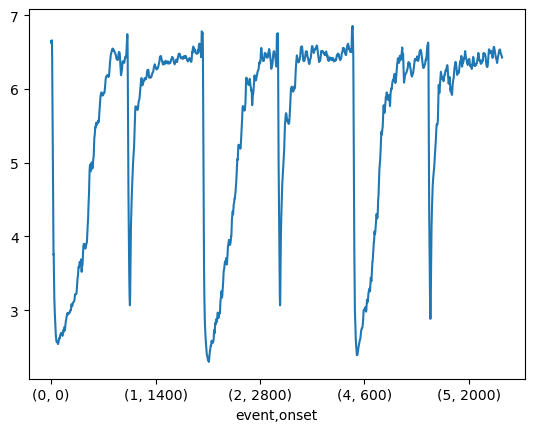

In [68]:
samples_eye0["diameter_3d"].plot()

In [69]:
avgs_eye0.to_csv(path_base + subj_base + '-average-pipr-eye0.csv') # processed data with adjusted onset indices (time in seconds)

In [70]:
df_eye1

timestamp  confidence  id   diameter  diameter_3d  \
event onset                                                               
0     -1.000000   573440.163083    0.816628   1  72.811310     5.483656   
      -0.983333   573440.178353    0.827817   1  72.554050     5.463566   
      -0.966667   573440.188935    0.807647   1  72.750597     5.478309   
      -0.950000   573440.201628    0.868783   1  72.805442     5.482758   
      -0.933333   573440.212669    0.877302   1  72.658144     5.471830   
...                         ...         ...  ..        ...          ...   
5      58.916667  573962.247837    0.844631   1  72.973289     5.470499   
       58.933333  573962.258157    0.830275   1  73.122514     5.482431   
       58.950000  573962.276146    0.773675   1  73.215044     5.490327   
       58.966667  573962.290792    0.842550   1  73.070583     5.477897   
       58.983333  573962.301462    0.823671   1  73.145087     5.483114   

                  orig_idx  diameter_3d_pc  diameter_pc colour  
event onset                                                     
0     -1.000000         87        0.198347     0.279446   blue  
      -0.983333         88       -0.168747    -0.074866   blue  
      -0.966667         89        0.100635     0.195829   blue  
      -0.950000         90        0.181932     0.271364   blue  
      -0.933333         91       -0.017746     0.068498   blue  
...                    ...             ...          ...    ...  
5      58.916667     32011       -1.407147    -1.170420    red  
       58.933333     32012       -1.192090    -0.968322    red  
       58.950000     32013       -1.049789    -0.843005    red  
       58.966667     32014       -1.273818    -1.038653    red  
       58.983333     32015       -1.179791    -0.937750    red  

[21600 rows x 9 columns]

Text(0.5, 1.0, 'Left Eye, Subject = 009')

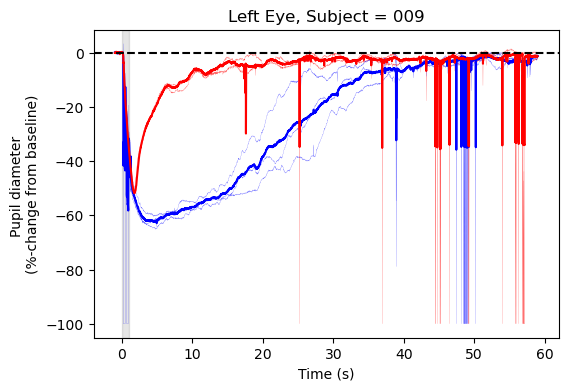

In [71]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(6,4))
for r in range(5):
    if (r==0 or r%2==0):
        c = 'blue'
    else:
        c = 'red'
    df_eye1.loc[r, 'diameter_pc'].plot(
        color=c, lw='.1', ax=ax, legend=False)

# Now show the means
avgs_eye1 = (df_eye1.reset_index()
                .groupby(['colour','onset'], as_index=False)
                .mean())
sns.lineplot(data=avgs_eye1, x='onset', y='diameter_pc', hue='colour',
                palette={'blue':'b','red':'r'}, legend=False)

# Tweak figures
ax.axvspan(0, 1, color='k', alpha=.1)
ax.axhline(0, 0, 1, color='k', ls='--')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Pupil diameter \n(%-change from baseline)')
ax.set_title('Left Eye, Subject = {}'.format(subject_id))

In [72]:
if not os.path.exists(path_base + 'figures'):
    os.makedirs(path_base + 'figures')
# Save the figure in the folder
fig.savefig(path_base + 'figures/' + 'pipr-90s-binoc-sub-009_ses-01_dat-20230818' + '-eye1.png')

In [73]:
df_eye1 # check all is as expected before sending to csv

timestamp  confidence  id   diameter  diameter_3d  \
event onset                                                               
0     -1.000000   573440.163083    0.816628   1  72.811310     5.483656   
      -0.983333   573440.178353    0.827817   1  72.554050     5.463566   
      -0.966667   573440.188935    0.807647   1  72.750597     5.478309   
      -0.950000   573440.201628    0.868783   1  72.805442     5.482758   
      -0.933333   573440.212669    0.877302   1  72.658144     5.471830   
...                         ...         ...  ..        ...          ...   
5      58.916667  573962.247837    0.844631   1  72.973289     5.470499   
       58.933333  573962.258157    0.830275   1  73.122514     5.482431   
       58.950000  573962.276146    0.773675   1  73.215044     5.490327   
       58.966667  573962.290792    0.842550   1  73.070583     5.477897   
       58.983333  573962.301462    0.823671   1  73.145087     5.483114   

                  orig_idx  diameter_3d_pc  diameter_pc colour  
event onset                                                     
0     -1.000000         87        0.198347     0.279446   blue  
      -0.983333         88       -0.168747    -0.074866   blue  
      -0.966667         89        0.100635     0.195829   blue  
      -0.950000         90        0.181932     0.271364   blue  
      -0.933333         91       -0.017746     0.068498   blue  
...                    ...             ...          ...    ...  
5      58.916667     32011       -1.407147    -1.170420    red  
       58.933333     32012       -1.192090    -0.968322    red  
       58.950000     32013       -1.049789    -0.843005    red  
       58.966667     32014       -1.273818    -1.038653    red  
       58.983333     32015       -1.179791    -0.937750    red  

[21600 rows x 9 columns]

In [74]:
df_eye1.to_csv(path_base + subj_base + '-processed-eye1.csv') # processed data with adjusted onset indices (time in seconds)

<AxesSubplot: xlabel='event,onset'>

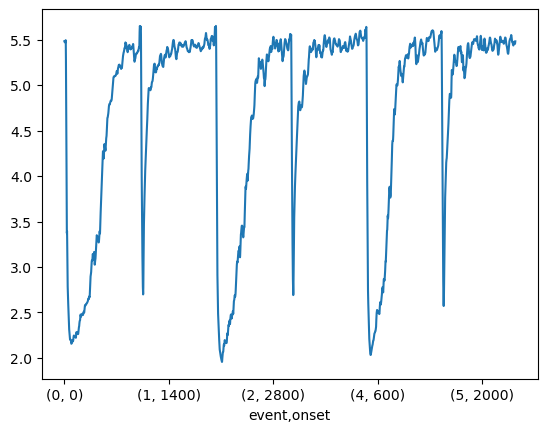

In [75]:
samples_eye1["diameter_3d"].plot()

In [76]:
avgs_eye1.to_csv(path_base + subj_base + '-average-pipr-eye1.csv') # processed data with adjusted onset indices (time in seconds)

**Compute the pupillary light response (optional, skip for now):**

In [ ]:
# adapt this to separate red and blue
from pyplr.plr import PLR

average_plr = df.mean(level=1)['diameter_3d'].to_numpy()
plr = PLR(average_plr,
          sample_rate=60,
          onset_idx=-offset,
          stim_duration=1)

In [ ]:
fig = plr.plot(vel=True, acc=True, print_params=True)

In [ ]:
params = plr.parameters()
params

**Compute the PIPR:**

In [77]:
# code to calculate PIPR at given time
pipr_time = 7 # measure PIPR at t=7s (6s after stimulus turned off)
print(avgs_eye0.loc[avgs_eye0["onset"] == pipr_time])
print(avgs_eye1.loc[avgs_eye1["onset"] == pipr_time])

     colour  onset  event      timestamp  confidence   id   diameter  \
480    blue    7.0    2.0  573631.437998    1.000000  0.0  28.047734   
4080    red    7.0    3.0  573722.269326    0.966153  0.0  58.269537   

      diameter_3d      orig_idx  diameter_3d_pc  diameter_pc  
480      2.675953  12608.666667      -59.210151   -58.469421  
4080     5.627539  18133.666667      -13.780751   -13.213982  
     colour  onset  event      timestamp  confidence   id   diameter  \
480    blue    7.0    2.0  573631.498221    1.000000  1.0  29.978588   
4080    red    7.0    3.0  573722.335745    0.970969  1.0  64.616509   

      diameter_3d      orig_idx  diameter_3d_pc  diameter_pc  
480      2.237140  12498.000000      -59.837251   -59.426029  
4080     4.865334  17952.333333      -12.678550   -12.650227  


In [78]:
# eye 0
blue_d_pipr_eye0 = avgs_eye0["diameter_3d"][480]
red_d_pipr_eye0 = avgs_eye0["diameter_3d"][4080]
blue_d_pipr_pc_eye0 = avgs_eye0["diameter_3d_pc"][480]
red_d_pipr_pc_eye0 = avgs_eye0["diameter_3d_pc"][4080]
pipr_diff_eye0 = red_d_pipr_eye0 - blue_d_pipr_eye0
pipr_pc_diff_eye0 = red_d_pipr_pc_eye0 - blue_d_pipr_pc_eye0
print("PIPR (Absolute Difference), Eye 0: ", pipr_diff_eye0)
print("PIPR (Percent Change), Eye 0: ", pipr_pc_diff_eye0)

PIPR (Absolute Difference), Eye 0:  2.9515857411614244
PIPR (Percent Change), Eye 0:  45.429400297703616


In [79]:
# eye 1
blue_d_pipr_eye1 = avgs_eye1["diameter_3d"][480]
red_d_pipr_eye1 = avgs_eye1["diameter_3d"][4080]
blue_d_pipr_pc_eye1 = avgs_eye1["diameter_3d_pc"][480]
red_d_pipr_pc_eye1 = avgs_eye1["diameter_3d_pc"][4080]
pipr_diff_eye1 = red_d_pipr_eye1 - blue_d_pipr_eye1
pipr_pc_diff_eye1 = red_d_pipr_pc_eye1 - blue_d_pipr_pc_eye1
print("PIPR (Absolute Difference), Eye 1: ", pipr_diff_eye1)
print("PIPR (Percent Change), Eye 1: ", pipr_pc_diff_eye1)

PIPR (Absolute Difference), Eye 1:  2.628194027658743
PIPR (Percent Change), Eye 1:  47.1587010109231
